In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [3]:
#read data
train_data= pd.read_csv('fashion-mnist_train.csv')
test_data=pd.read_csv('fashion-mnist_test.csv')

In [4]:
train_data.shape

(60000, 785)

In [5]:
test_data.shape

(10000, 785)

In [6]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
names=['TShirt/Top','Trouser','PullOver','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkelBoot']

In [8]:
x_train=train_data.iloc[:,1:].to_numpy()
x_train=x_train.reshape([-1,28,28,1])
x_train=x_train/255

y_train=train_data.iloc[:,0].to_numpy()

In [9]:
x_test=test_data.iloc[:,1:].to_numpy()
x_test=x_test.reshape([-1,28,28,1])
x_test=x_test/255

y_test=test_data.iloc[:,0].to_numpy()

In [10]:
#Visualization

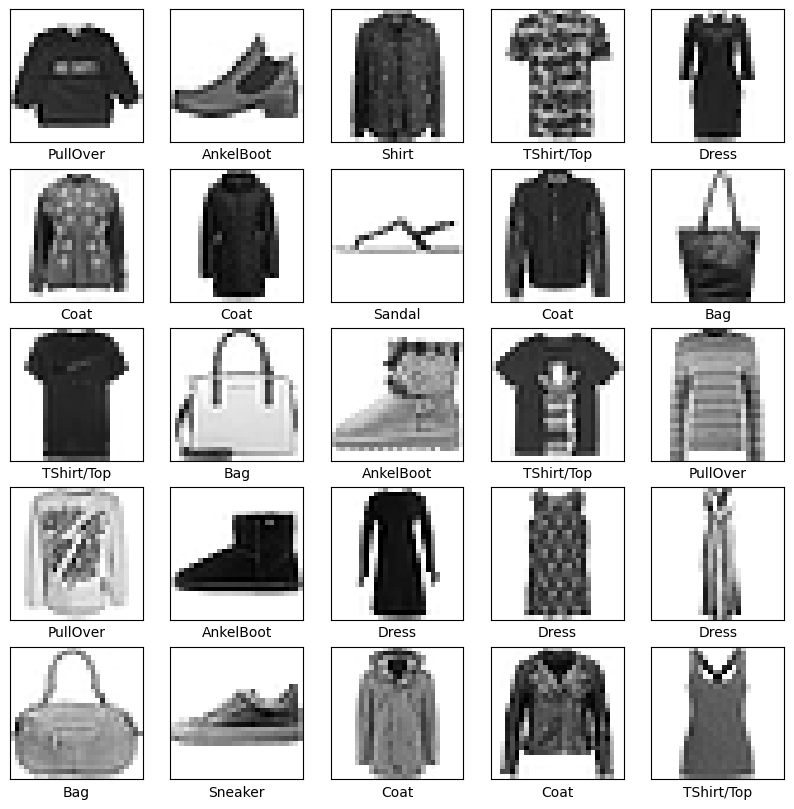

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(names[y_train[i]])
  plt.grid(False)

plt.show()

In [30]:
#Model Build
model =Sequential()

In [31]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       346,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,114 (1.32 MB)

 Trainable params: 347,114 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.fit(x_train,y_train,epochs=10,batch_size=40,validation_split=0.2)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.7632 - loss: 0.6588 - val_accuracy: 0.8767 - val_loss: 0.3509
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 91s 47ms/step - accuracy: 0.8892 - loss: 0.3155 - val_accuracy: 0.8998 - val_loss: 0.2899
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 73s 40ms/step - accuracy: 0.9024 - loss: 0.2703 - val_accuracy: 0.9038 - val_loss: 0.2704
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 77s 37ms/step - accuracy: 0.9151 - loss: 0.2360 - val_accuracy: 0.9051 - val_loss: 0.2640
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 44s 37ms/step - accuracy: 0.9217 - loss: 0.2190 - val_accuracy: 0.9034 - val_loss: 0.2672
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 45s 37ms/step - accuracy: 0.9279 - loss: 0.2005 - val_accuracy: 0.9078 - val_loss: 0.2630
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9309 - loss: 0.1873 - val_accuracy: 0.9123 - val_loss: 0.2562
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9340 -

In [36]:
y_probas=model.predict(x_test)
y_pred=y_probas.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


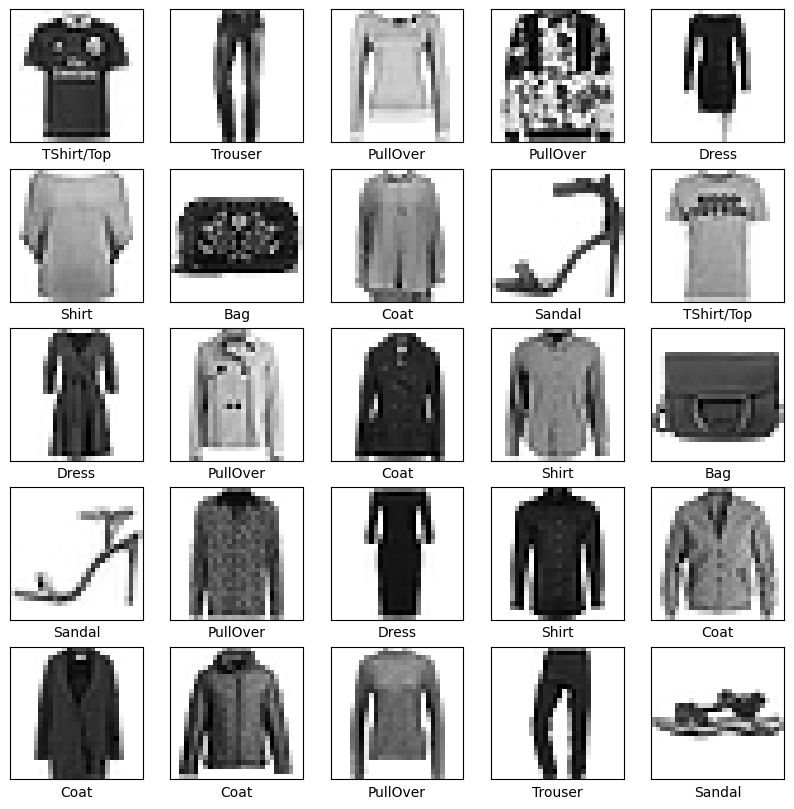

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_test[i],cmap=plt.cm.binary)
  plt.xlabel(names[y_pred[i]])
  plt.xticks([])
  plt.yticks([])
plt.show();

In [39]:
loss,accuracy= model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9097 - loss: 0.2533


In [40]:
loss

0.24298095703125

In [41]:
accuracy

0.9174000024795532